In [1]:
import numpy as np
from numpy import pi, sqrt, exp, arcsin, arctan, arccos
import numpy.ma as ma
from scipy import stats
from scipy import optimize

import matplotlib as mpl
import matplotlib.pyplot as plt

# mpl.use('pgf')
if mpl.get_backend() == 'pgf':
    pass
else:
    %matplotlib inline 
    %config InlineBackend.figure_format = 'retina'
    
FIGURE_PATH='figures/'
DATA_PATH='data/'

from scipy.constants import h, m_e, k, N_A, pi, e, hbar, u, k, mu_0

from scipy.optimize import curve_fit
import scipy.integrate as integrate
from scipy.stats import chi2
from scipy.special import gamma
from itertools import product
import scipy.odr as odr

In [2]:
def sf(x):
    # calculate significant figures
    # return: decimal place to be rounded to
    if isinstance(x, float) or isinstance(x,int):
        if x == 0:
            return 20 
        else:
            return int(-1 * np.floor(np.log10(x)) + 1)
    else:
        return (-1 * np.floor(np.log10(np.min(ma.masked_where(x==0,x)))) + 1).astype(int)

In [3]:
def cm2inch(lst):
    inch = 2.54
    if isinstance(lst, list):
        return [x/inch for x in lst] 
    elif isinstance(lst, float):
        return lst/inch

default_width =  cm2inch(21/sqrt(2)) # 5.78853 # approx 14.7cm
default_ratio = (sqrt(5.0) - 1.0) / 2.0 # golden mean
print(default_width)

5.846158427132873


In [4]:
default_width = cm2inch(21/sqrt(2))
default_ratio = default_ratio = (sqrt(5.0) - 1.0) / 2.0 # golden mean

In [5]:
from matplotlib import rcParams
from matplotlib import cycler
if mpl.get_backend() == 'pgf':
    rcParams.update({'legend.loc' : 'best'})
    rcParams.update({
        "text.usetex": True,
        "pgf.texsystem": "xelatex",
        "pgf.rcfonts": False,
        "font.family": "serif",
        "font.serif": [],
        "font.sans-serif": [],
        "font.monospace": [],
        "figure.figsize": [default_width, default_width * default_ratio],
        "pgf.preamble": [
            r"\usepackage[utf8x]{inputenc}",
            r"\usepackage[T1]{fontenc}",
        ],
        "figure.constrained_layout.use": True,
    })
    rcParams.update({'savefig.bbox' : 'standard'})
    rcParams.update({'savefig.pad_inches' : 0.0})
else:
    rcParams.update({'figure.autolayout': True})
    rcParams.update({'figure.figsize' : [15,9.47]})
    rcParams.update({'font.size' : 16})
rcParams.update({'errorbar.capsize' : 4})
rcParams.update({'legend.loc' : 'best'})
rcParams.update({'axes.prop_cycle': cycler('color', ["#cf115d", "#786eb3", "#bce333", "#99c1b8", "#0cc0aa", "#8547d9", "#76f014", "#ea85f5"])})
rcParams.update({'lines.markeredgecolor': 'black',
                 'lines.markerfacecolor': 'black'})

###### Fit function to data
```
def fit_function(x, param1, param2, param3):
    return param1*x**param3 + param2 

popt, pcov = curve_fit(fit_function, x, y, sigma = error_array)

param1 = popt[0]
param1_err = pcov[0][0]
```

###### Plot data

```
# initiate figure
if mpl.get_backend() == 'pgf':
    plt.clf()
    plt.figure(figsize=(default_width, default_width*default_ratio))

# plots
plt.errorbar(x, y, linestyle='none', marker='.', yerr=error_array)
plt.plot(x,fit_function(x, *popt))

# options
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('title')
# plt.xticks(x)
# plt.yscale('log') # set y scale to logarithmic
plt.legend()

# save and show
filename='filename'
if mpl.get_backend() == 'pgf':
    plt.savefig(FIGURE_PATH+filename+'.pgf', format='pgf')
    plt.savefig(FIGURE_PATH+filename+'.pdf', format='pdf')
    plt.clf()
plt.savefig(FIGURE_PATH+filename+'.jpg', format='jpg')
plt.show()
```

###### Load .txt data into arrays
```
data1, data2 = np.loadtxt('data/dataset.txt', skiprows=1, usecols=(0,1), unpack=True)
```

###### Significant Figures
```
print(f"val: {round(val,sf(val_err))} +/- {round(val_err,sf(val_err))}")
```

# Teil 4: Frequenzgang eines Serienschwingkreises 

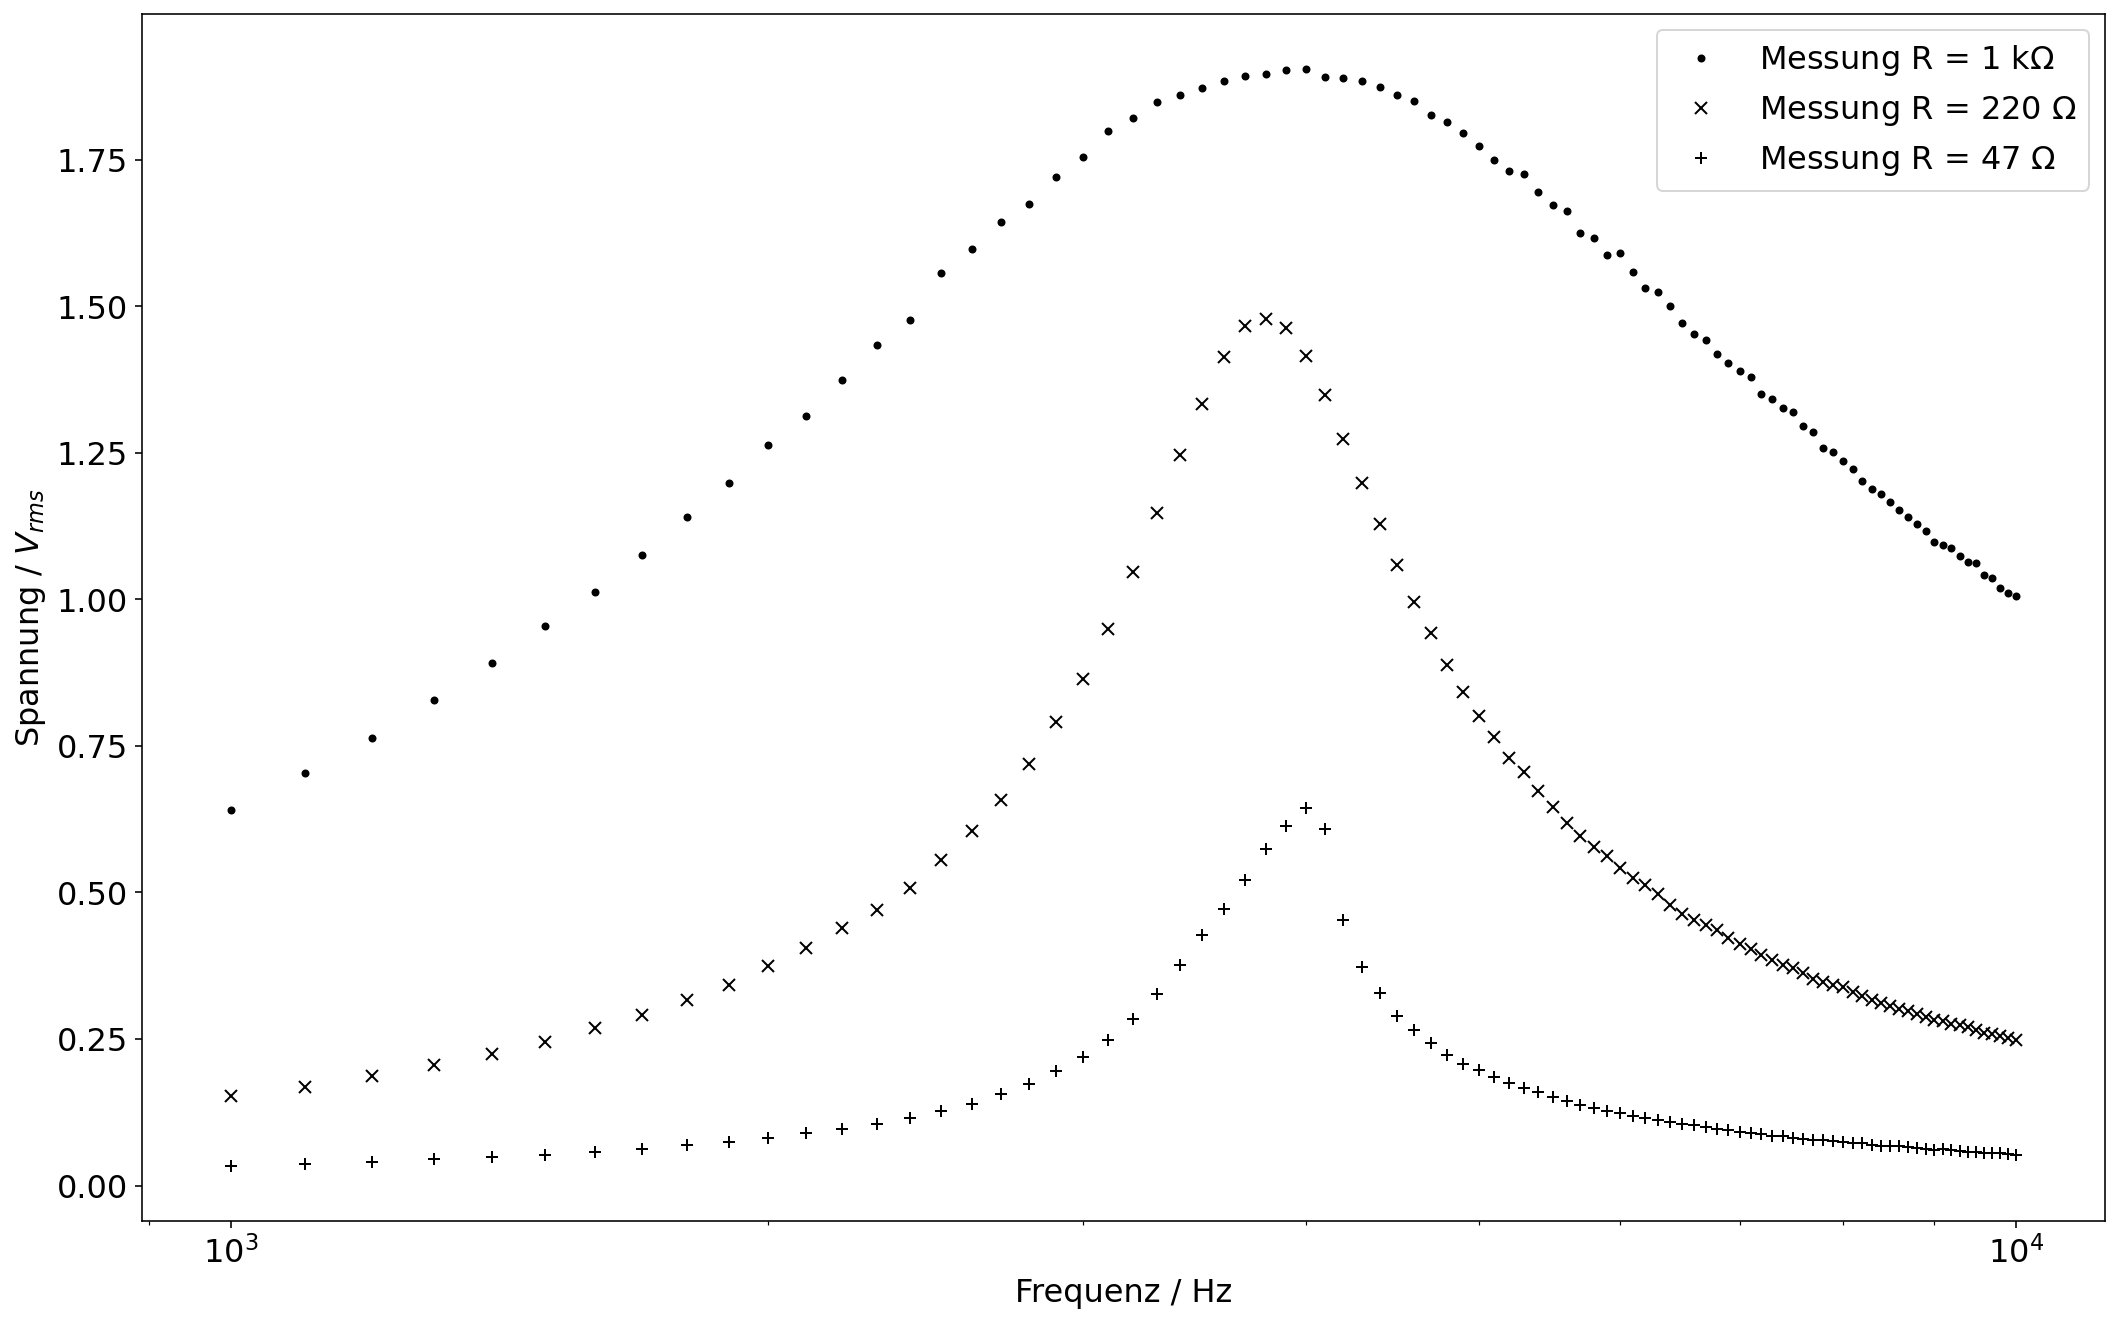

In [6]:
frequenz_1k , effektivwert_1k , effekivwert_log_1k = np.loadtxt(DATA_PATH+'Messung4_Bandpassfilter.txt', skiprows=1,
                                                                max_rows=91,
                                                                unpack=True)

frequenz_220 , effektivwert_220 , effekivwert_log_220 = np.loadtxt(DATA_PATH+'Messung4_Bandpassfilter.txt',
                                                                   skiprows=93,
                                                                   max_rows=91, 
                                                                   unpack=True)

frequenz_47 , effektivwert_47 , effekivwert_log_47 = np.loadtxt(DATA_PATH+'Messung4_Bandpassfilter.txt',
                                                                skiprows=185,
                                                                max_rows=91,
                                                                unpack=True)

# initiate figure
if mpl.get_backend() == 'pgf':
    plt.clf()
    plt.figure(figsize=(default_width, default_width*default_ratio))


plt.plot(frequenz_1k , effektivwert_1k,  linestyle = "None" , marker = "." , label = r"Messung R = 1 k$\Omega$")
plt.plot(frequenz_220 , effektivwert_220,  linestyle = "None" , marker = "x" , label = r"Messung R = 220 $\Omega$")
plt.plot(frequenz_47 , effektivwert_47,  linestyle = "None" , marker = "+" , label = r"Messung R = 47 $\Omega$")

plt.xscale('log')
plt.xlabel('Frequenz / Hz')
plt.ylabel('Spannung / $V_{rms}$')
plt.legend()

# save and show
filename='aufgabe4_messdaten'
if mpl.get_backend() == 'pgf':
    plt.savefig(FIGURE_PATH+filename+'.pgf', format='pgf')
    plt.savefig(FIGURE_PATH+filename+'.pdf', format='pdf')
    plt.clf()

plt.show()

## Auswertung

In [7]:
versuche = [] 

versuch = {
    'R': 1000,
    'R_err': 0.05 * 1000,
    'C': 47e-9,
    'C_err': 0.01 * 47e-9,
    'frequenz': frequenz_1k,
    'effektivwert': effektivwert_1k ,
}
versuche.append(versuch)

versuch = {
    'R': 220, 
    'R_err': 0.05 * 220,
    'C': 47e-9,
    'C_err': 0.01 * 47e-9,
    'frequenz': frequenz_220,
    'effektivwert': effektivwert_220 ,
}
versuche.append(versuch)

versuch = {
    'R': 47,
    'R_err': 0.05 * 47,
    'C': 47e-9,
    'C_err': 0.01 * 47e-9,
    'frequenz': frequenz_47,
    'effektivwert': effektivwert_47 ,
}
versuche.append(versuch)

### Bestimmung der Fitfunktion


R = 1000Ohm
U0:     1.897598670693615 +/- 0.0018554346523625613 Vrms
R_ges:  1130.0945062113597 +/- 3.4530174671880443 Ohm
L :     0.03475936168830668 +/- 6.801527471093249e-05 H

R = 220Ohm
U0:     1.459297706020943 +/- 0.004740039665719934 Vrms
R_ges:  327.22310215272864 +/- 2.0106797748516723 Ohm
L :     0.0370983958442237 +/- 7.102136030587778e-05 H

R = 47Ohm
U0:     0.6254842760255286 +/- 0.007967689370545606 Vrms
R_ges:  157.31381929181933 +/- 3.472475547646351 Ohm
L :     0.035894569760249996 +/- 0.00013315794142231227 H


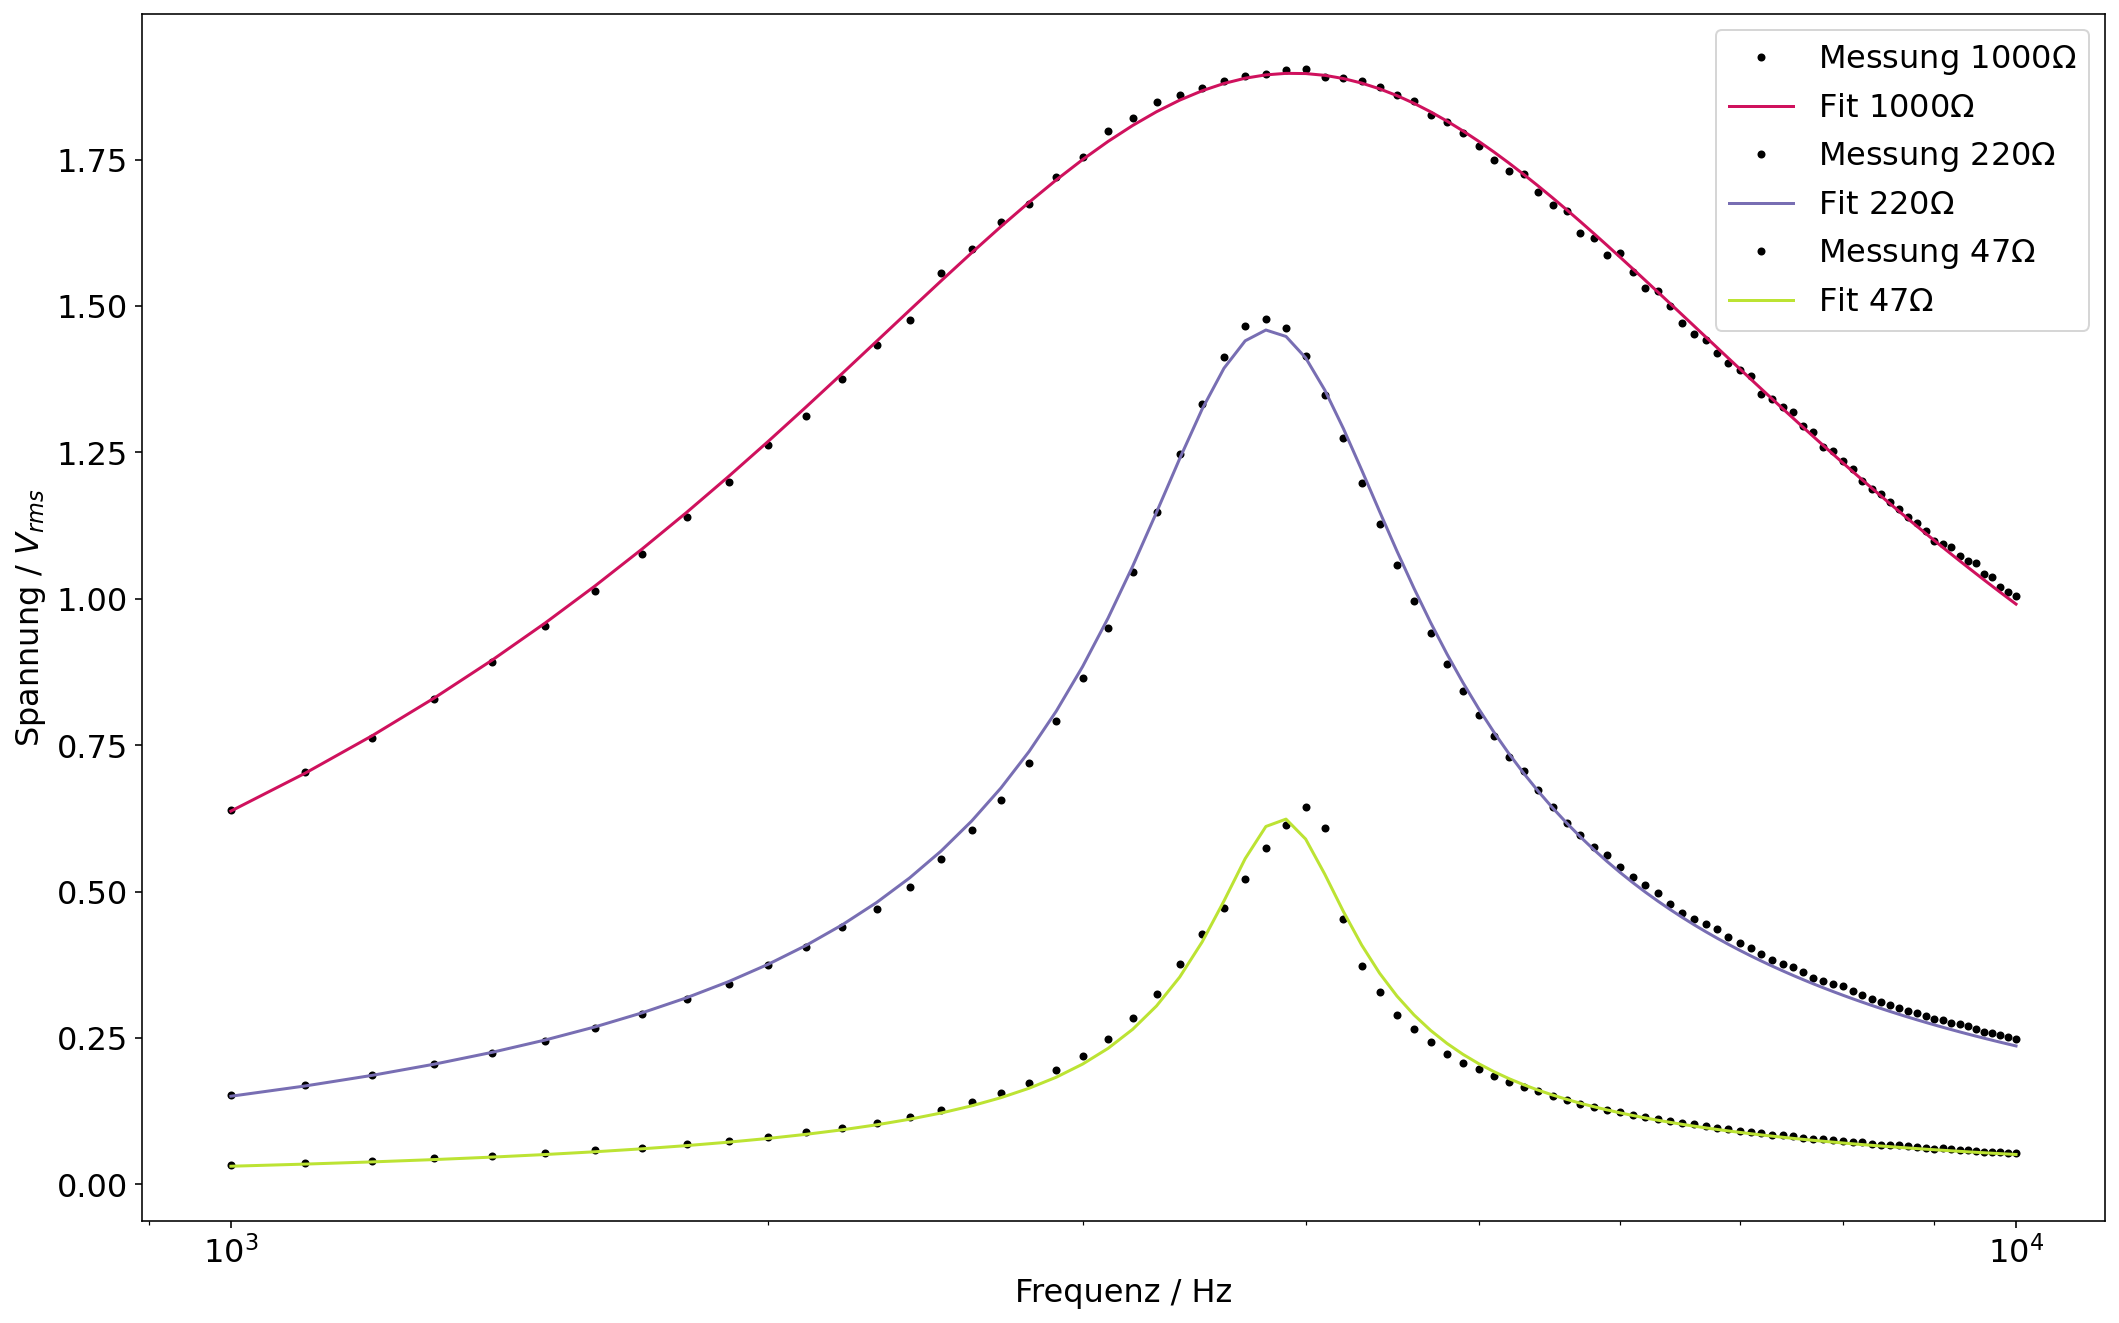

In [8]:
for v in versuche:
    C = v['C']
    C_err = v['C_err']
    R = v['R']
    R_err = v['R_err']
    
    frequenz = v['frequenz']
    effektivwert = v['effektivwert']
    
    def fit_func(B, x):
        U_0, R_ges, L = B
        return U_0 * R_ges /  np.sqrt(R_ges**2 + (2*np.pi*x *L - 1/(2*np.pi*x *C))**2)

    model = odr.Model(fit_func)

    data = odr.Data(frequenz, effektivwert, we=0.005, wd=10)

    case = odr.ODR(data, model, beta0=[0.6, 157.0, 0.034]) #, 47e-9])

    output = case.run()
    
    v['U0']        = output.beta[0]
    v['U0_err']    = output.sd_beta[0]
    v['R_ges']     = output.beta[1]
    v['R_ges_err'] = output.sd_beta[1]
    v['L']         = output.beta[2]
    v['L_err']     = output.sd_beta[2]
    v['beta']      = output.beta
    v['sd_beta']   = output.sd_beta

    print(f'\nR = {R}Ohm')
    print(f'U0:     {output.beta[0]} +/- {output.sd_beta[0]} Vrms')
    print(f'R_ges:  {output.beta[1]} +/- {output.sd_beta[1]} Ohm')
    print(f'L :     {output.beta[2]} +/- {output.sd_beta[2]} H')

    plt.plot(frequenz, effektivwert, linestyle='None', marker='.', label=fr'Messung {R}$\Omega$', color='black')
    plt.plot(frequenz, fit_func(output.beta, frequenz), label=fr'Fit {R}$\Omega$')
    
plt.xscale('log')
plt.xlabel('Frequenz / Hz')
plt.ylabel('Spannung / $V_{rms}$')
plt.legend()

plt.show()

In [9]:
L = np.mean([v['L'] for v in versuche])
L_err = 1/3 * np.sqrt(np.sum([v['L_err']**2 for v in versuche]))
print(L)
print(L_err)
for v in versuche:
    v['L'] = L
    v['L_err'] = L_err

0.03591744243092679
5.51776409804721e-05


In [10]:
for v in versuche:
    F_RES = np.array([]) 
    
    beta = v['beta']
    sd_beta = v['sd_beta']
    
    for c_err in [0,1,-1]:
        beta0 = beta + c_err * sd_beta

        def func1(x):
            return -1*fit_func(beta0, x)

        f_res = optimize.fminbound(func1, 1000,10000)

        F_RES = np.append(F_RES, f_res)

    f_res = np.mean(F_RES) 
    f_res_err = np.std(F_RES) / np.sqrt(len(F_RES))
    
    v['f_res'] = f_res
    v['f_res_err'] = f_res_err

    print(f'\nR = {v["R"]} Ohm')
    print(f'Resonanzfrequenz: f = {f_res} +/- {f_res_err} Hz')


R = 1000 Ohm
Resonanzfrequenz: f = 3937.637386799643 +/- 1.816094365737018 Hz

R = 220 Ohm
Resonanzfrequenz: f = 3811.4834191401205 +/- 1.7198568638613163 Hz

R = 47 Ohm
Resonanzfrequenz: f = 3874.8805666322587 +/- 3.388154218181667 Hz


### Bestimmung der Bandbreite

In [11]:
for v in versuche:
    F1 = np.array([])
    F2 = np.array([])

    # initialise variables
    R = v['R_ges']
    L = v['L'] 
    U0 = v['U0'] 
    U0_err = v['U0_err'] 
    beta = v['beta']

    for c_err in [0,1,-1]:
        U0_corr = U0 + c_err*U0_err

        # Funktionen mit Nullenstellenabstand gleich der Bandbreite
        def func2(x):
            return fit_func(beta,x) - U0_corr/np.sqrt(2)

        # Guess für halbe Bandbreite
        guess_hbw = R/(2*L * 2 * pi)

        f1 = optimize.root(func2, f_res-guess_hbw)
        f2 = optimize.root(func2, f_res+guess_hbw)

        F1 = np.append(F1, f1.x[0])
        F2 = np.append(F2, f2.x[0])

    f1 = np.mean(F1) 
    f1_err = np.std(F2) / np.sqrt(len(F1)) 

    f2 = np.mean(F2) 
    f2_err = np.std(F2) / np.sqrt(len(F2)) 
    
    v['f1'] = f1
    v['f1_err'] = f1_err
    v['f2'] = f2
    v['f2_err'] = f2_err

    print(f'\nR = {v["R"]} Ohm')
    print(f'f1 = {f1} +/- {f1_err} Hz')
    print(f'f2 = {f2} +/- {f2_err} Hz')
    
    bandbreite = np.abs(f1 - f2)
    bandbreite_err = np.sqrt(f1_err**2 + f2_err**2)
    v['bandbreite'] = bandbreite
    v['bandbreite_err'] = bandbreite_err
    
    print(f'Bandbreite: {bandbreite} +/- {bandbreite_err} Hz')


R = 1000 Ohm
f1 = 2124.3272303028766 +/- 3.694745913854228 Hz
f2 = 7298.76751706069 +/- 3.694745913854228 Hz
Bandbreite: 5174.440286757814 +/- 5.225159780895225 Hz

R = 220 Ohm
f1 = 3173.6627683027036 +/- 2.538848514236478 Hz
f2 = 4577.484667563814 +/- 2.538848514236478 Hz
Bandbreite: 1403.82189926111 +/- 3.590474001644009 Hz

R = 47 Ohm
f1 = 3541.741962989663 +/- 4.5649139073755975 Hz
f2 = 4239.339979542326 +/- 4.5649139073755975 Hz
Bandbreite: 697.5980165526626 +/- 6.455763158876128 Hz


### Berechneter Verlustwiderstand aus Bandbreite

In [12]:
for v in versuche:
    # initialise variables
    R = v['R']
    R_err = v['R_err'] 
    bandbreite = v['bandbreite']
    bandbreite_err = v['bandbreite_err']
    L = v['L']
    L_err = v['L_err']
    
    # calculation
    R_V = bandbreite * 2 * pi * L - R 
    R_V_err = np.sqrt((2*pi*L*bandbreite_err)**2 + (bandbreite*2*pi*L_err)**2 + R_err**2)
    
    # save to dict
    v['R_Vb'] = R_V
    v['R_Vb_err'] = R_V_err
    
    # print results
    print(f'\nR = {v["R"]} Ohm')
    print(f'R_V: {R_V} +/- {R_V_err} Ohm')


R = 1000 Ohm
R_V: 167.74670959846708 +/- 50.046065717471606 Ohm

R = 220 Ohm
R_V: 96.80883590823794 +/- 11.040535744323678 Ohm

R = 47 Ohm
R_V: 110.43109269934385 +/- 2.775532398087237 Ohm


### Berechneter Verlustwiderstand aus Spannungsteiler

In [13]:
for v in versuche:
    # initialise variables
    U_E = 1.96 
    U_E_err = 0.01
    U_A = v['U0']
    U_A_err = v['U0_err']
    R = v['R_ges']
    R_err = v['R_ges_err']
    
    # calculation
    R_V = R * (U_E / U_A - 1) 
    R_V_err =  np.sqrt(((U_E/U_A - 1)* R_err)**2
                       + (R/U_A * U_E_err)**2
                       + (R*U_E/U_A**2 * U_A_err)**2)
                    
    # save to dict
    v['R_Vr'] = R_V
    v['R_Vr_err'] = R_V_err
    
    # print results
    print(f'\nR = {v["R"]} Ohm')
    print(f'R_V: {R_V} +/- {R_V_err} Ohm')


R = 1000 Ohm
R_V: 37.16244141531515 +/- 6.064833709569842 Ohm

R = 220 Ohm
R_V: 112.27411460651135 +/- 2.7462570100792583 Ohm

R = 47 Ohm
R_V: 335.64035658482806 +/- 10.032308883915837 Ohm


### Berechnung des Verlustwiderstandes aus Fitparametern

In [14]:
for v in versuche:
    # initialise variables
    R_ges = v['R_ges']
    R_ges_err = v['R_ges_err']
    R = v['R']
    R_err = v['R_err']
    
    # calculations
    R_V = R_ges - R
    R_V_err = np.sqrt(R_ges_err**2 + R_err**2)
    
    # save to dict
    v['R_Vp'] = R_V
    v['R_Vp_err'] = R_V_err
    
    # print results
    print(f'\nR = {v["R"]} Ohm')
    print(f'R_V: {R_V} +/- {R_V_err} Ohm')


R = 1000 Ohm
R_V: 130.09450621135966 +/- 50.119091468508344 Ohm

R = 220 Ohm
R_V: 107.22310215272864 +/- 11.1822552804431 Ohm

R = 47 Ohm
R_V: 110.31381929181933 +/- 4.192920990073844 Ohm


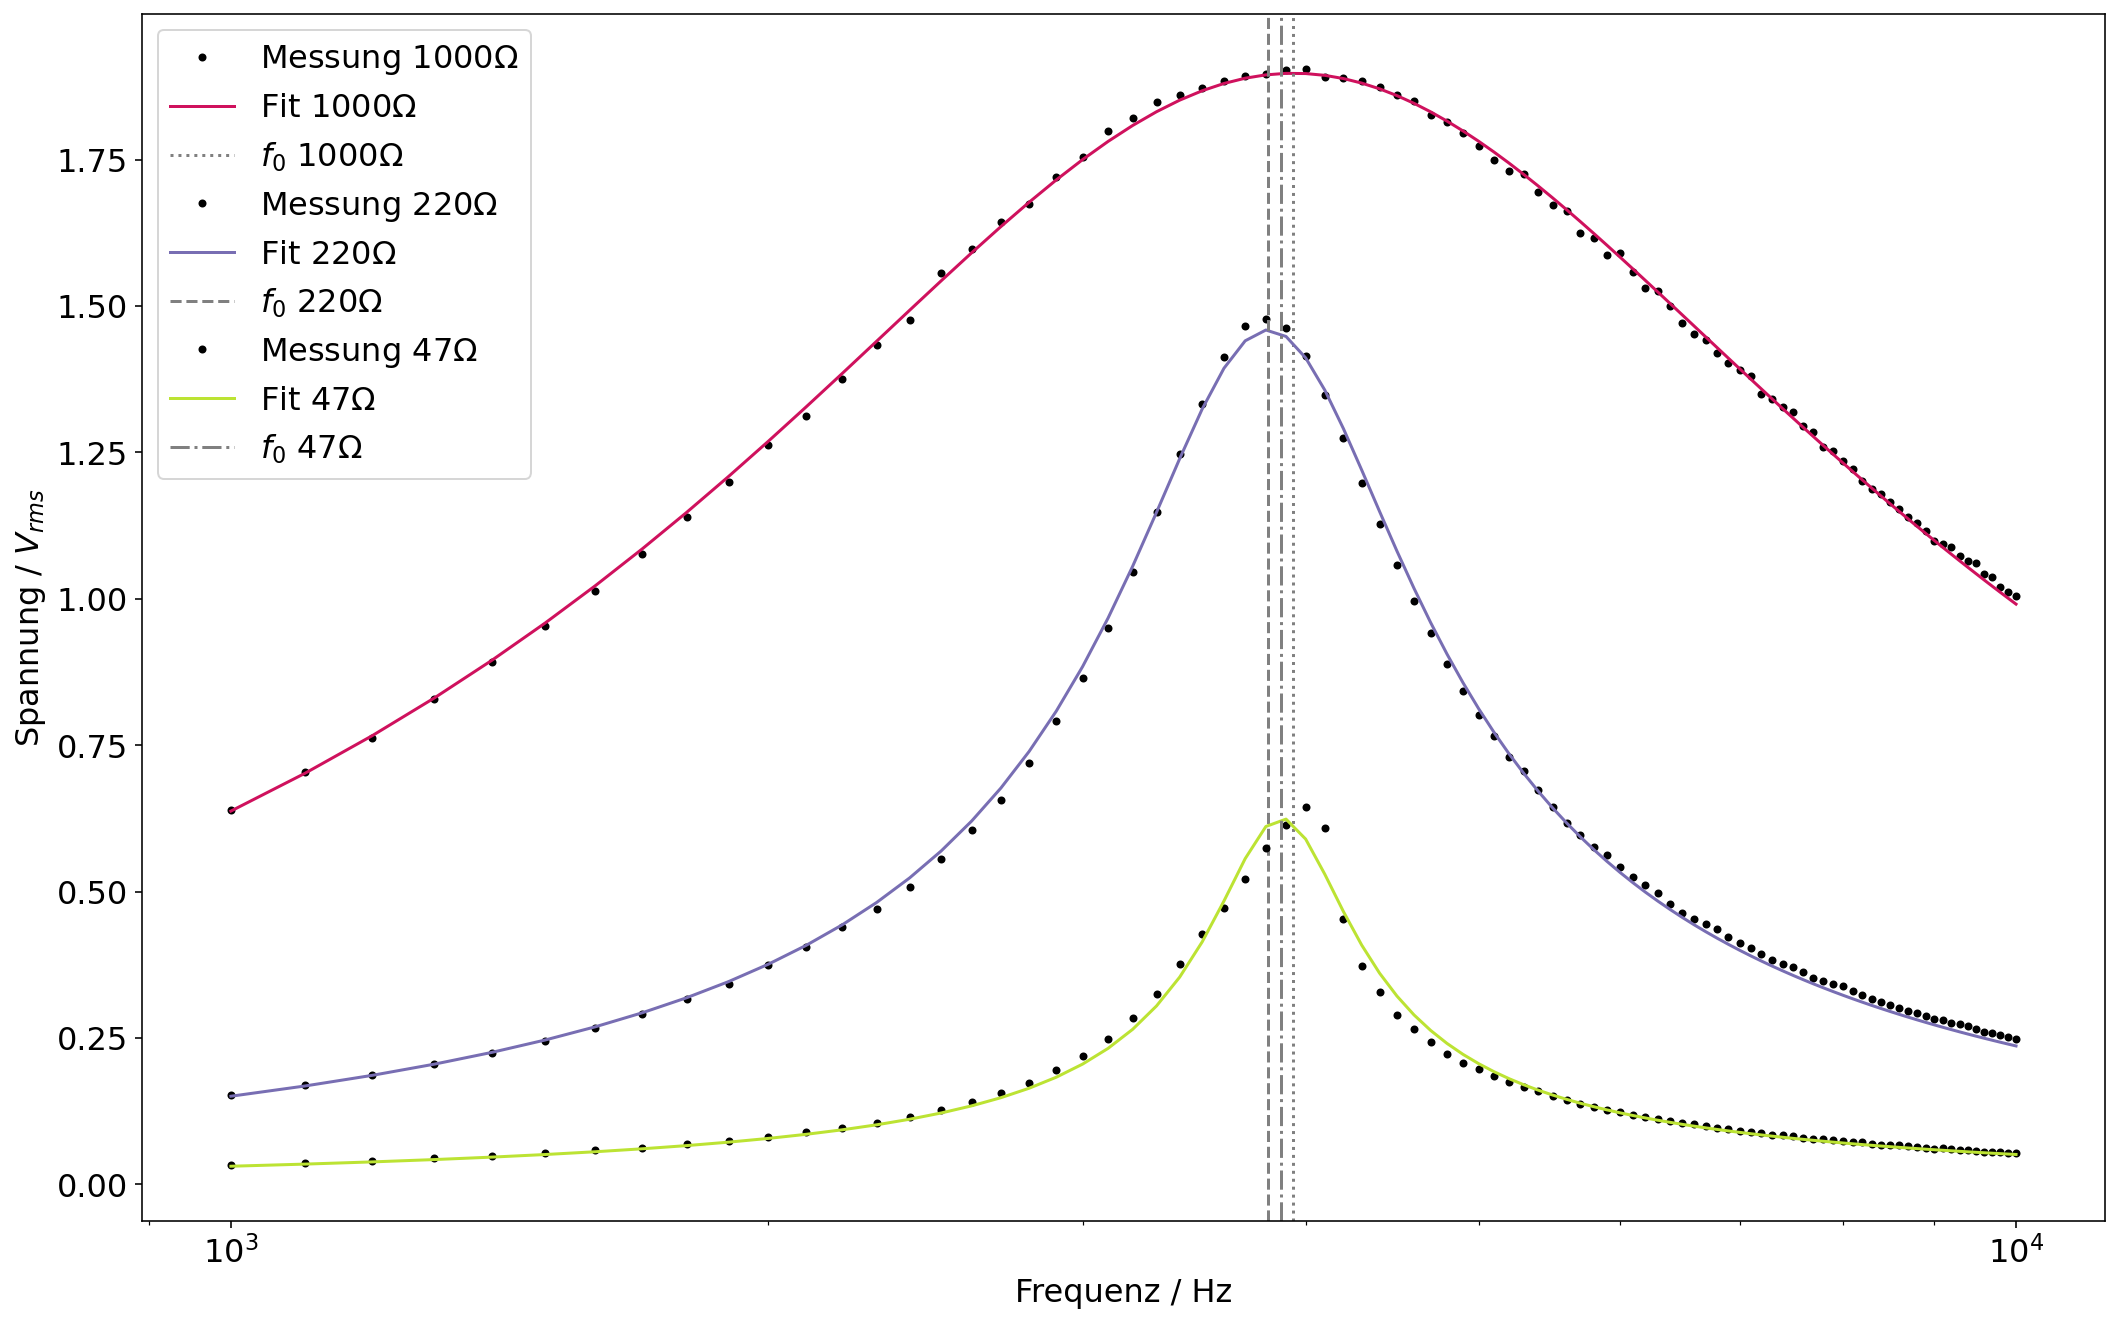

In [15]:
def fit_func(B, x):
    U_0, R_ges, L = B
    return U_0 * R_ges /  np.sqrt(R_ges**2 + (2*np.pi*x *L - 1/(2*np.pi*x *C))**2)

# initiate figure
if mpl.get_backend() == 'pgf':
    plt.clf()
    plt.figure(figsize=(default_width, default_width*default_ratio))

f_res_ls = [':', '--', '-.']
for i, v in enumerate(versuche): 
    frequenz = v['frequenz']
    effektivwert = v['effektivwert']
    R = v['R']
    
    beta = v['beta']

    plt.plot(frequenz, effektivwert, linestyle='None', marker='.', label=fr'Messung {R}$\Omega$', color='black')
    plt.plot(frequenz, fit_func(beta, frequenz), label=fr'Fit {R}$\Omega$')
    
    plt.axvline(x=v['f_res'], linestyle=f_res_ls[i], color='gray', label=fr'$f_0$ {R}$\Omega$')
    
plt.xscale('log')
plt.xlabel('Frequenz / Hz')
plt.ylabel('Spannung / $V_{rms}$')
plt.legend()

# save and show
filename=f'aufgabe4_fit'
if mpl.get_backend() == 'pgf':
    plt.savefig(FIGURE_PATH+filename+'.pgf', format='pgf')
    plt.savefig(FIGURE_PATH+filename+'.pdf', format='pdf')
    plt.clf()
plt.show()

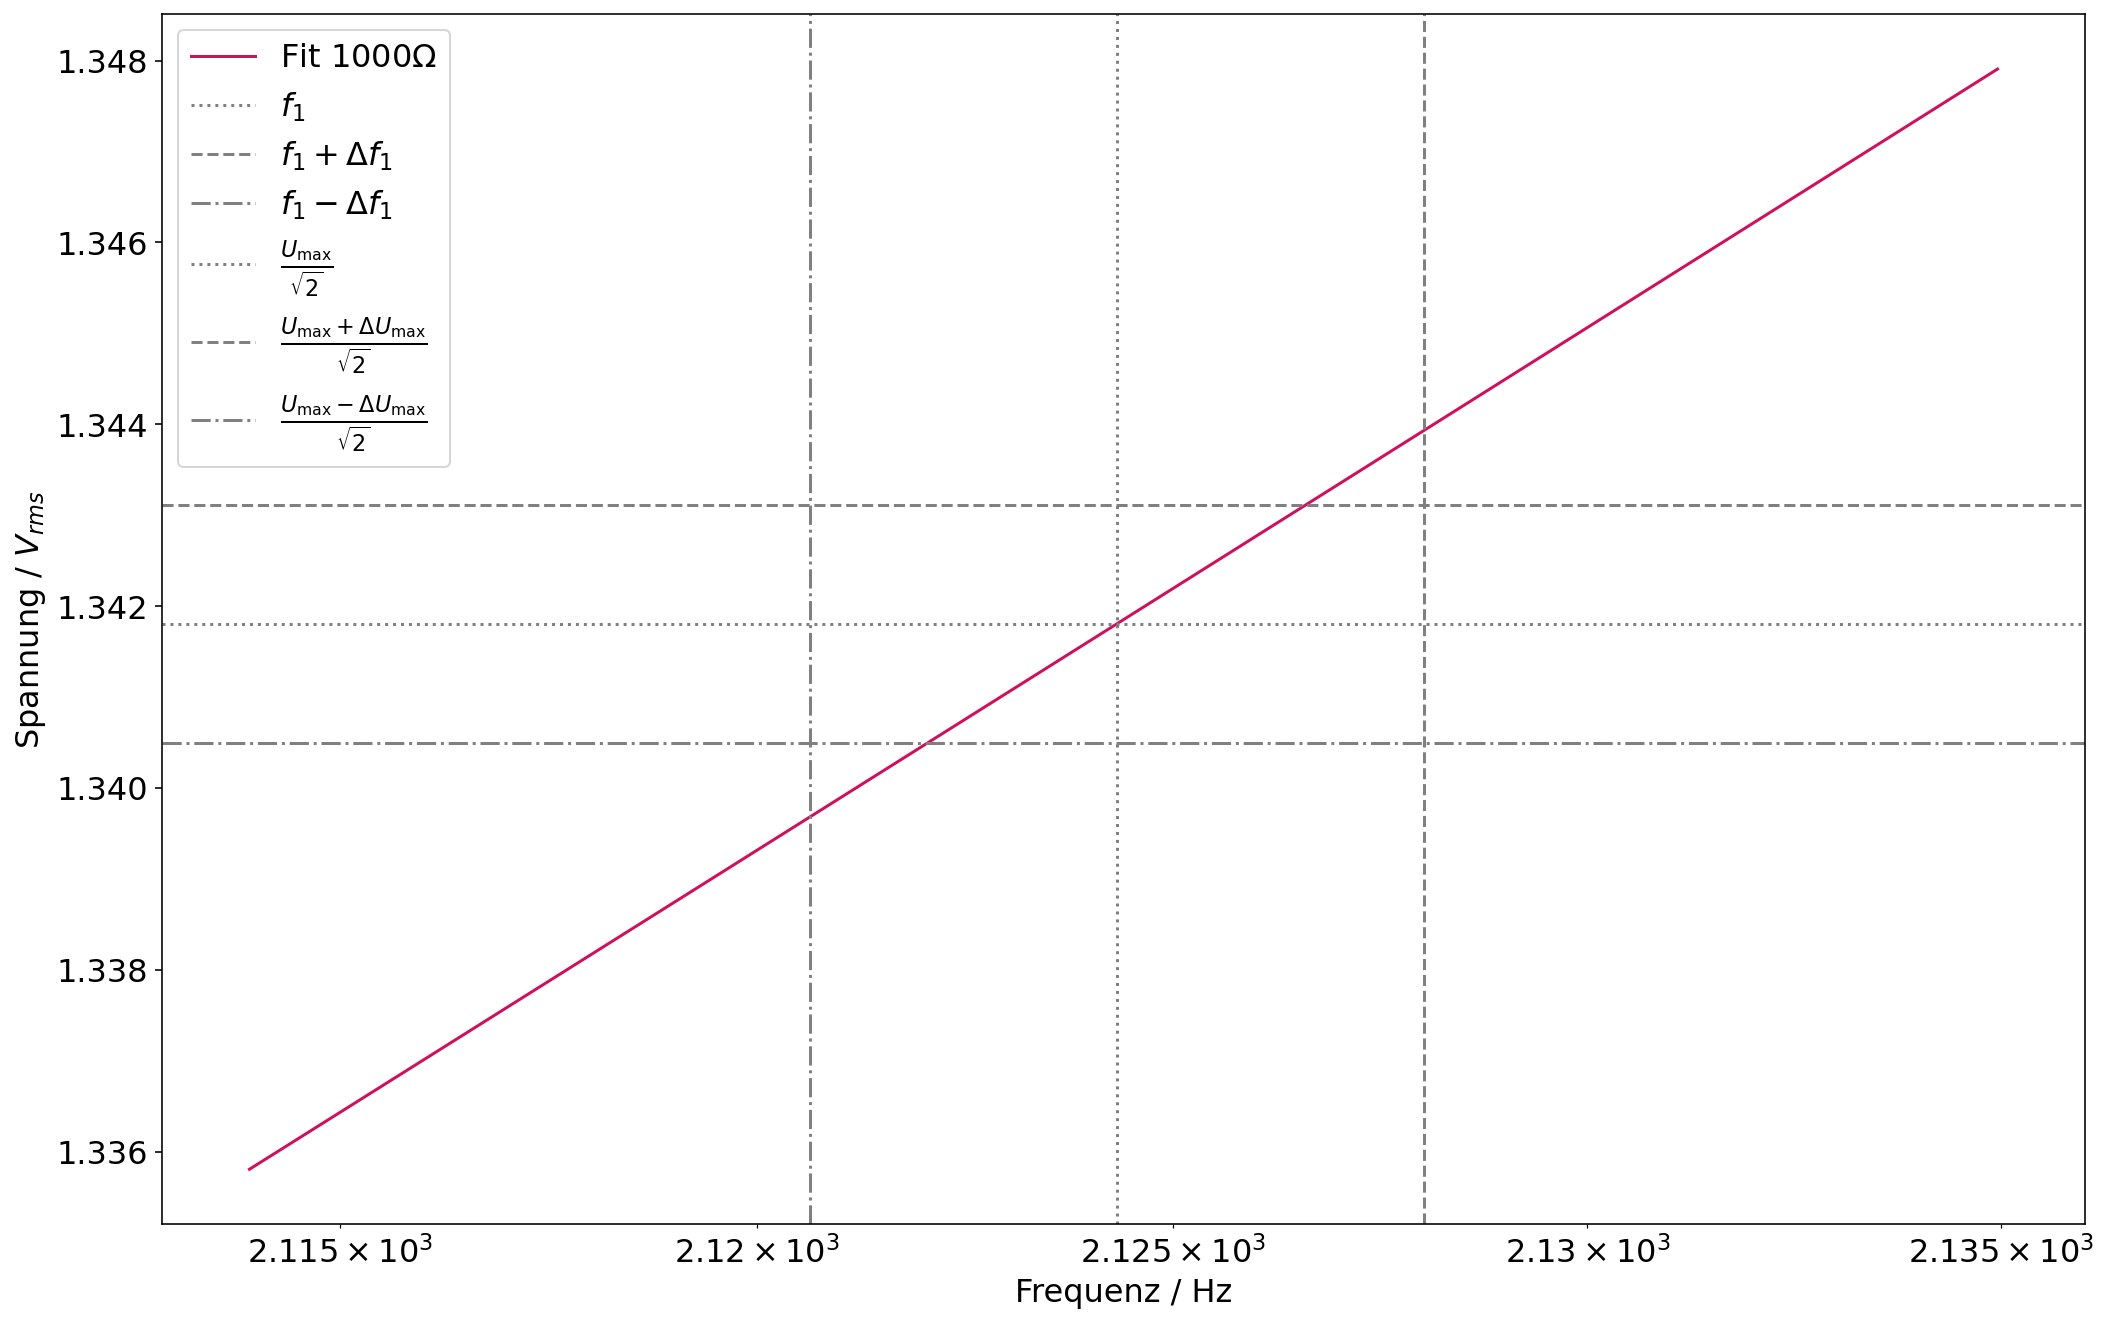

1.897598670693615
1.8994541053459775


In [16]:
def fit_func(B, x):
    U_0, R_ges, L = B
    return U_0 * R_ges /  np.sqrt(R_ges**2 + (2*np.pi*x *L - 1/(2*np.pi*x *C))**2)

# initiate figure
if mpl.get_backend() == 'pgf':
    plt.clf()
    plt.figure(figsize=(default_width, default_width*default_ratio))

f_res_ls = [':', '--', '-.','-']
v = versuche[0]
frequenz = v['frequenz']
effektivwert = v['effektivwert']
R = v['R']

beta = v['beta']

f1 = v['f1']
f1_err = v['f1_err']

f = np.linspace(f1*0.2, f1*2, 2000)
index = ((f > f1-3*f1_err) & (f < f1+3*f1_err))
plt.plot(f[index], fit_func(beta, f[index]), label=fr'Fit {R}$\Omega$')

plt.axvline(x=f1, linestyle=f_res_ls[0], color='gray', label=fr'$f_1$')
plt.axvline(x=f1+f1_err, linestyle=f_res_ls[1], color='gray', label=fr'$f_1+\Delta f_1$')
plt.axvline(x=f1-f1_err, linestyle=f_res_ls[2], color='gray', label=fr'$f_1-\Delta f_1$')
plt.axhline(y=v['U0']/np.sqrt(2), linestyle=f_res_ls[0], color='gray', label=r'$\frac{U_{\max}}{\sqrt{2}}$')
plt.axhline(y=(v['U0']+v['U0_err'])/np.sqrt(2), linestyle=f_res_ls[1], color='gray', label=r'$\frac{U_{\max}+\Delta U_{\max}}{\sqrt{2}}$')
plt.axhline(y=(v['U0']-v['U0_err'])/np.sqrt(2), linestyle=f_res_ls[2], color='gray', label=r'$\frac{U_{\max}-\Delta U_{\max}}{\sqrt{2}}$')

plt.xscale('log')
plt.xlabel('Frequenz / Hz')
plt.ylabel('Spannung / $V_{rms}$')
plt.legend()

# save and show
filename=f'aufgabe4_num'
if mpl.get_backend() == 'pgf':
    plt.savefig(FIGURE_PATH+filename+'.pgf', format='pgf')
    plt.savefig(FIGURE_PATH+filename+'.pdf', format='pdf')
    plt.clf()
plt.show()
"""
1.897598670693615
1.8994541053459775
1.8957432360412525 
"""
print(v['U0'])
print(v['U0']+v['U0_err'])